# KNN对数据进行预测

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 导入数据

In [2]:
iris = load_iris() # iris.feature_names查看特征名称，iris.target_names类别名称
data = iris.data
target = iris.target

totalData = pd.DataFrame(np.c_[data,target], columns=['sepalLength', 'sepalWidth', 
                                                      'petalLength','petalWidth','label'])
totalData[['label']] = totalData[['label']].astype(int) # 修改列的数据类型
totalData.head()

,sepalLength,sepalWidth,petalLength,petalWidth,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2. 数据展示

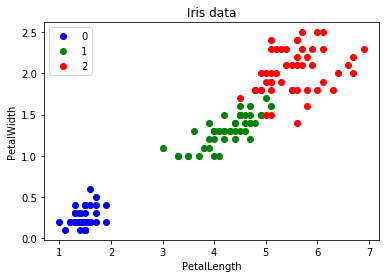

In [3]:
def plotData(data):
    totalData0 = data.loc[data.label==0, ]
    totalData1 = data.loc[data.label==1, ]
    totalData2 = data.loc[data.label==2, ]
    plt.plot(totalData0.loc[:,"petalLength"], totalData0.loc[:,"petalWidth"], "bo",label="0")
    plt.plot(totalData1.loc[:,"petalLength"], totalData1.loc[:,"petalWidth"], "go",label="1")
    plt.plot(totalData2.loc[:,"petalLength"], totalData2.loc[:,"petalWidth"], "ro",label="2")
    plt.xlabel("PetalLength");plt.ylabel("PetalWidth");plt.title("Iris data")
    plt.legend()
plotData(totalData)

# 3. 进行KNN算法的实现

In [4]:
class KNN:
    def __init__(self, data, k=3):
        self.data = data
        self.k = 3
    def distFun(self, a, b):
        a = np.array(a)
        b = np.array(b)
        distValue = np.sum(pow(abs(a - b),2))*1.0/len(a) 
        return distValue
    def predict(self, unkownData): # unkownData 需要是np.array类型
        distList = []
        for i in range(len(self.data)):
            distValue = self.distFun(self.data.iloc[i,:-1], unkownData) # 这里函数的引用要加self,注意
            distList.append(distValue)
        self.data['dist'] = distList
        self.data.sort_values("dist", inplace=True)
        predictLabel = self.data.iloc[:self.k, -2].value_counts().argmax()
        return predictLabel

# 4. 对位置数据进行预测

In [5]:
KnnModel = KNN(totalData.iloc[:,:5])
KnnModel.data.head()
unknown = np.array([5.0, 3.7, 1.4, 0.6])
predictLabel = KnnModel.predict(unknown)
print "预测数据:[5.0, 3.7, 1.4, 0.6]"
print "预测结果: %d"%predictLabel

预测数据:[5.0, 3.7, 1.4, 0.6]
预测结果: 0


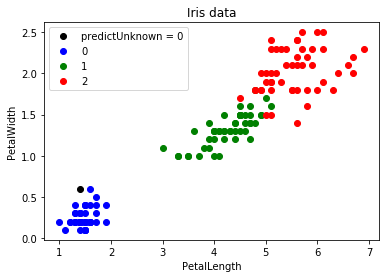

In [6]:
plt.plot(unknown[2],unknown[3], "ko",label="predictUnknown = %d"%predictLabel)
plotData(totalData)
